<a href="https://colab.research.google.com/github/MosesIbe23/CSE450_Machine_Learning/blob/main/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv', encoding='ISO-8859-1')
#df.info()
#df.head()
#housing.head()


In [122]:

#Rename Columns for easier wrangling

df.rename(columns={
    'Have you seen any of the 6 films in the Star Wars franchise?': 'Seen_any_movies?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Fan_of_the_film?',
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
    'Unnamed: 10': 'rank_2',
    'Unnamed: 11': 'rank_3',
    'Unnamed: 12': 'rank_4',
    'Unnamed: 13': 'rank_5',
    'Unnamed: 14': 'rank_6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'fav_char_1',
    'Unnamed: 16': 'fav_char_2',
    'Unnamed: 17': 'fav_char_3',
    'Unnamed: 18': 'fav_char_4',
    'Unnamed: 19': 'fav_char_5',
    'Unnamed: 20': 'fav_char_6',
    'Unnamed: 21': 'fav_char_7',
    'Unnamed: 22': 'fav_char_8',
    'Unnamed: 23': 'fav_char_9',
    'Unnamed: 24': 'fav_char_10',
    'Unnamed: 25': 'fav_char_11',
    'Unnamed: 26': 'fav_char_12',
    'Unnamed: 27': 'fav_char_13',
    'Unnamed: 28': 'fav_char_14',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.1': 'fav_char_15',
    'Unnamed: 30': 'fav_char_16',
    'Unnamed: 31': 'fav_char_17',
    'Unnamed: 32': 'fav_char_18',
    'Unnamed: 33': 'fav_char_19',
    'Unnamed: 34': 'fav_char_20',
    'Unnamed: 35': 'fav_char_21',
    'Unnamed: 36': 'fav_char_22',
    'Unnamed: 37': 'fav_char_23',
    'Unnamed: 38': 'fav_char_24',
    'Unnamed: 39': 'fav_char_25',
    'Unnamed: 40': 'fav_char_26',
    'Unnamed: 41': 'fav_char_27',
    'Unnamed: 42': 'fav_char_28',
    'Which character shot first?': 'Character_shot_first?',
    'Are you familiar with the Expanded Universe?': 'Familiar_expanded_universe?',
    'Do you consider yourself to be a fan of the Expanded Universe?æ': 'Expanded_universe_fan?',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'Startrek_fan?',
    'Gender': 'Gender',
    'Age': 'Age',
    'Household Income': 'H_Income',
    'Education': 'Education',
    'Location (Census Region)': 'Location'
}, inplace=True)

df.head()


,RespondentID,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,fav_char_14,Character_shot_first?,Familiar_expanded_universe?,Expanded_universe_fan?,Startrek_fan?,Gender,Age,H_Income,Education,Location
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [123]:
#Drop RespondentID column

df.drop('RespondentID', axis=1, inplace=True)
#df

# Filter respondents who have seen at least one film
df = df[df['Seen_any_movies?'] == 'Yes']

# Remove all leading, trailing, and extra spaces within the strings
columns_to_strip = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
df[columns_to_strip] = df[columns_to_strip].apply(lambda col: col.str.strip().str.replace(r'\s+', ' ', regex=True))

# Modify 'seen_1' - 'seen_6' to return 1 if the value is the specific movie, otherwise 0
df['seen_1'] = df['seen_1'].apply(lambda x: 1 if x == "Star Wars: Episode I The Phantom Menace" else 0)
df['seen_2'] = df['seen_2'].apply(lambda x: 1 if x == "Star Wars: Episode II Attack of the Clones" else 0)
df['seen_3'] = df['seen_3'].apply(lambda x: 1 if x == "Star Wars: Episode III Revenge of the Sith" else 0)
df['seen_4'] = df['seen_4'].apply(lambda x: 1 if x == "Star Wars: Episode IV A New Hope" else 0)
df['seen_5'] = df['seen_5'].apply(lambda x: 1 if x == "Star Wars: Episode V The Empire Strikes Back" else 0)
df['seen_6'] = df['seen_6'].apply(lambda x: 1 if x == "Star Wars: Episode VI Return of the Jedi" else 0)

# Create a new column for age
age_mapping = {
    '18-29': 1,
    '30-44': 2,
    '45-60': 3,
    '> 60': 4
}
df['age_numeric'] = df['Age'].map(age_mapping)
df.drop('Age', axis=1, inplace=True)

# Create a new column for education
education_mapping = {
    'High school degree': 1,
    'Some college or Associate degree': 2,
    'Bachelor degree': 3,
    'Graduate degree': 4
}
df['education_numeric'] = df['Education'].map(education_mapping)
df.drop('Education', axis=1, inplace=True)

# Create a new column for income
income_mapping = {
    '$0 - $24,999': 1,
    '$25,000 - $49,999': 2,
    '$50,000 - $99,999': 3,
    '$100,000 - $149,999': 4,
    '$150,000+': 5
}
df['income_numeric'] = df['H_Income'].map(income_mapping)
df.drop('H_Income', axis=1, inplace=True)

# Derived Columns for age, gender, income and education
df['age_income_interaction'] = df['age_numeric'] * df['income_numeric']
df['age_education_interaction'] = df['age_numeric'] * df['education_numeric']
df['income_education_interaction'] = df['income_numeric'] * df['education_numeric']

# Create target column
df['target'] = (df['income_numeric'] > 3).astype(int)

df.head()
#df.info()


<ipython-input-123-18e7b3544762>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_strip] = df[columns_to_strip].apply(lambda col: col.str.strip().str.replace(r'\s+', ' ', regex=True))
<ipython-input-123-18e7b3544762>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seen_1'] = df['seen_1'].apply(lambda x: 1 if x == "Star Wars: Episode I The Phantom Menace" else 0)
<ipython-input-123-18e7b3544762>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,...,Startrek_fan?,Gender,Location,age_numeric,education_numeric,income_numeric,age_income_interaction,age_education_interaction,income_education_interaction,target
1,Yes,Yes,1,1,1,1,1,1,3,2,...,No,Male,South Atlantic,1.0,1.0,NaN,NaN,1.0,NaN,0
3,Yes,No,1,1,1,0,0,0,1,2,...,No,Male,West North Central,1.0,1.0,1.0,1.0,1.0,1.0,0
4,Yes,Yes,1,1,1,1,1,1,5,6,...,Yes,Male,West North Central,1.0,2.0,4.0,4.0,2.0,8.0,1
5,Yes,Yes,1,1,1,1,1,1,5,4,...,No,Male,West North Central,1.0,2.0,4.0,4.0,2.0,8.0,1
6,Yes,Yes,1,1,1,1,1,1,1,4,...,Yes,Male,Middle Atlantic,1.0,3.0,2.0,2.0,3.0,6.0,0


In [124]:
#print(df.isnull().sum())

In [125]:
# Replace blank values with NaN, and drop any remaining rows with missing values
df.replace("", np.nan, inplace=True)

# # Impute missing values
# numerical_cols = ['age_numeric', 'education_numeric', 'income_numeric']
# for col in numerical_cols:
#     df[col].fillna(df[col].mean(), inplace=True)

# # For categorical columns, we'll replace NaN values with the mode
# categorical_cols = ['Gender', 'Location', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
# for col in categorical_cols:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# Combine numerical and categorical column logic
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        if 'N/A' in df[col].unique():  # Check if 'N/A' is in the column
            df[col].replace('N/A', None, inplace=True)  # Replace 'N/A' with NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure column is numeric
        df[col].fillna(df[col].mean(), inplace=True)  # Fill NaN with mean
    else:  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill NaN with mode

# Verify that there are no more missing values
print(df.isnull().sum())

# Map categorical values to numerical values
gender_mapping = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(gender_mapping)

# Encode location column
location_mapping = {
    'East North Central': 1,
    'East South Central': 2,
    'Middle Atlantic': 3,
    'Mountain': 4,
    'New England': 5,
    'Pacific': 6,
    'South Atlantic': 7,
    'West North Central': 8,
    'West South Central': 9
}
df['Location'] = df['Location'].map(location_mapping)
df.head()


Seen_any_movies?                0
Fan_of_the_film?                0
seen_1                          0
seen_2                          0
seen_3                          0
seen_4                          0
seen_5                          0
seen_6                          0
rank_1                          0
rank_2                          0
rank_3                          0
rank_4                          0
rank_5                          0
rank_6                          0
fav_char_1                      0
fav_char_2                      0
fav_char_3                      0
fav_char_4                      0
fav_char_5                      0
fav_char_6                      0
fav_char_7                      0
fav_char_8                      0
fav_char_9                      0
fav_char_10                     0
fav_char_11                     0
fav_char_12                     0
fav_char_13                     0
fav_char_14                     0
Character_shot_first?           0
Familiar_expan

<ipython-input-125-902d8d7c3720>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill NaN with mode
<ipython-input-125-902d8d7c3720>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,...,Startrek_fan?,Gender,Location,age_numeric,education_numeric,income_numeric,age_income_interaction,age_education_interaction,income_education_interaction,target
1,Yes,Yes,1,1,1,1,1,1,3,2,...,No,0,7,1.0,1.0,2.89037,7.496296,1.0,8.374443,0
3,Yes,No,1,1,1,0,0,0,1,2,...,No,0,8,1.0,1.0,1.00000,1.000000,1.0,1.000000,0
4,Yes,Yes,1,1,1,1,1,1,5,6,...,Yes,0,8,1.0,2.0,4.00000,4.000000,2.0,8.000000,1
5,Yes,Yes,1,1,1,1,1,1,5,4,...,No,0,8,1.0,2.0,4.00000,4.000000,2.0,8.000000,1
6,Yes,Yes,1,1,1,1,1,1,1,4,...,Yes,0,3,1.0,3.0,2.00000,2.000000,3.0,6.000000,0


In [126]:
# Define features and target

traindf = pd.get_dummies(df, drop_first= True)
traindf = traindf.reindex(columns=traindf.columns, fill_value=0)
traindf

# Drop 'income_numeric' since it directly defines the target
X = traindf.drop(['income_numeric', 'target'], axis=1)
y = traindf['target']  # Target variable indicating if income is more than $50k

X

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Gender,Location,age_numeric,education_numeric,...,fav_char_14_Somewhat favorably,fav_char_14_Somewhat unfavorably,fav_char_14_Unfamiliar (N/A),fav_char_14_Very favorably,fav_char_14_Very unfavorably,Character_shot_first?_Han,Character_shot_first?_I don't understand this question,Familiar_expanded_universe?_Yes,Expanded_universe_fan?_Yes,Startrek_fan?_Yes
1,1,1,1,1,1,1,0,7,1.0,1.0,...,False,False,False,True,False,False,True,True,False,False
3,1,1,1,0,0,0,0,8,1.0,1.0,...,False,False,True,False,False,False,True,False,False,False
4,1,1,1,1,1,1,0,8,1.0,2.0,...,False,False,False,True,False,False,True,False,False,True
5,1,1,1,1,1,1,0,8,1.0,2.0,...,True,False,False,False,False,False,False,True,False,False
6,1,1,1,1,1,1,0,3,1.0,3.0,...,False,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1,1,1,1,1,1,1,6,3.0,2.0,...,False,False,False,True,False,True,False,False,False,False
1182,1,1,1,1,1,1,1,1,1.0,2.0,...,False,False,False,True,False,True,False,False,False,True
1183,1,1,1,1,1,1,1,4,2.0,3.0,...,False,False,False,True,False,False,True,False,False,True
1185,1,1,1,1,1,1,1,1,3.0,2.0,...,False,False,False,True,False,True,False,False,False,True


Fitting 5 folds for each of 8 candidates, totalling 40 fits

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       149
           1       0.80      0.95      0.87        39

    accuracy                           0.94       188
   macro avg       0.90      0.94      0.92       188
weighted avg       0.95      0.94      0.94       188


Accuracy Score: 0.94


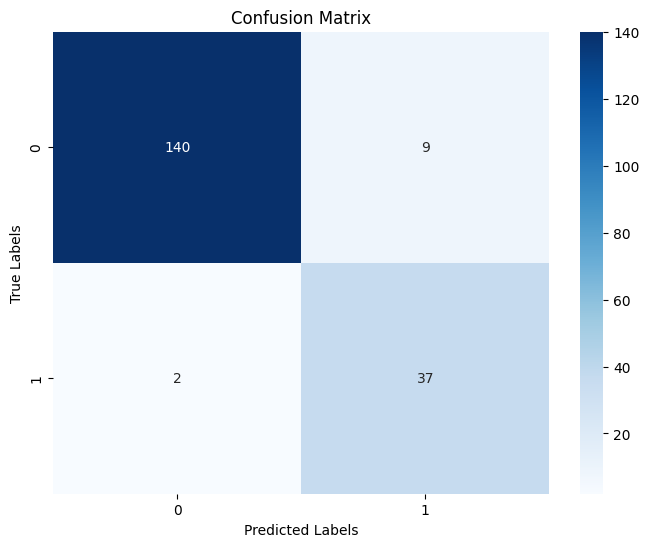

In [127]:
from sklearn.model_selection import GridSearchCV

# Step 2: Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()  # Or MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Step 4: Perform feature selection (optional)
# num_features = 20
# selector = SelectKBest(score_func=mutual_info_classif, k=num_features)
# X_train_selected = selector.fit_transform(X_train_scaled, y_train)
# X_test_selected = selector.transform(X_test_scaled)

# Step 1: Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Step 2: Train the model (Logistic Regression example)
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

# Step 3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # L1 (Lasso) or L2 (Ridge) regularization
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Step 4: Evaluate the best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Classification Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits = 2))
print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 2))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


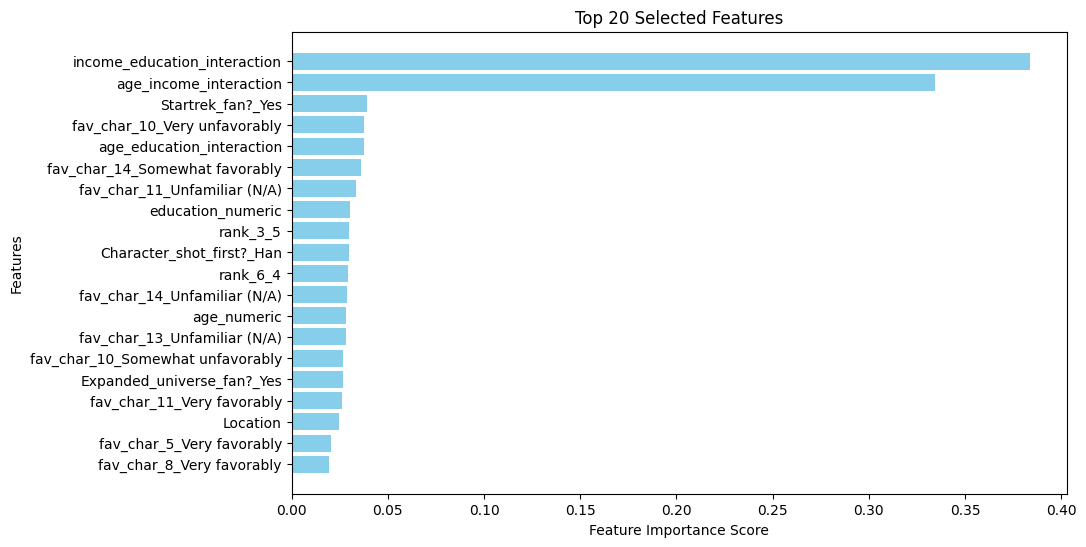

In [128]:
# Visualize the top 20 features with their scores
def plot_top_features(X_train, feature_names, selector, num_features=20):
    # Get the scores of all features
    feature_scores = selector.scores_

    # Sort the scores in descending order and get the top `num_features`
    top_indices = np.argsort(feature_scores)[-num_features:][::-1]
    top_features = [feature_names[i] for i in top_indices]
    top_scores = feature_scores[top_indices]

    # Plot the top features
    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_scores, color='skyblue')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Top 20 Selected Features")
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.show()

# Call the function after fitting the selector
feature_names = X.columns  # Assuming X is a pandas DataFrame with feature names

# Define the selector here (or move its definition outside of any function)
from sklearn.feature_selection import SelectKBest, mutual_info_classif # Make sure these are imported
selector = SelectKBest(score_func=mutual_info_classif, k=20) # Initialize SelectKBest
selector.fit(X_train, y_train) # Fit the selector to your data

plot_top_features(X_train, feature_names, selector, num_features=20)


F1-Score: 0.87
ROC-AUC: 0.99


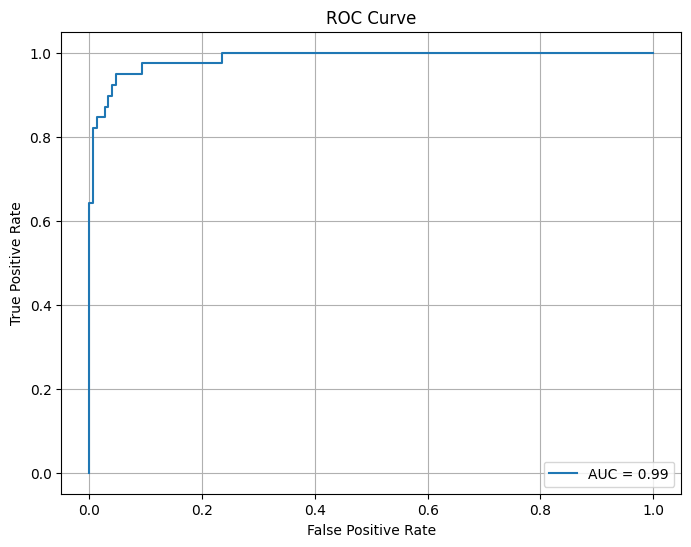

Average Precision-Recall AUC: 0.96


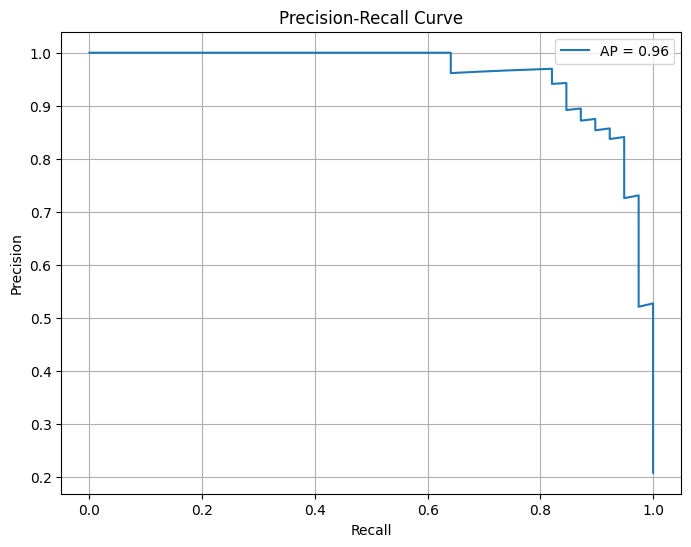

In [129]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", round(f1, 2))

# ROC-AUC
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", round(roc_auc, 2))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)
print("Average Precision-Recall AUC:", round(average_precision, 2))

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {average_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid()
plt.show()